In [2]:
# Hombres de Latveria: 175 cm de media y 6 cm de desviación típica
# Mujeres de Latveria: 169 cm de media y 6 cm de desviación típica
# Hombres en Symkaria: 171 cm de media y 3 cm de desviación típica
# Mujeres en Symkaria: 173 cm de media y 7 cm de desviación típica
# a) Conforma un dataframe con las medidas de 2000 hombres y de 2000 mujeres de cada población. Calcula la media y la desviación típica de la 
# población.
# b) Realiza un muestreo estratificado con 4 estratos y n=100 por estrato. Calcula la media y la desviación típica de cada estrato.
# c) Realiza un muestreo por conglomerado con 2 conglomerados y n=200 por conglomerado. Calcula la media y la desviación típica de cada conglomerado.

In [77]:
# Apartado a)

import numpy as np
import pandas as pd
from plotnine import *

np.random.seed(seed=3)
hombres_Latveria = np.random.normal(175,6,2000)
mujeres_Latveria = np.random.normal(169,6,2000)
hombres_Symkaria = np.random.normal(171,3,2000)
mujeres_Symkaria = np.random.normal(173,7,2000)

dic = {'Hombres Latveria':hombres_Latveria, 'Mujeres Latveria': mujeres_Latveria, 'Hombres Symkaria': hombres_Symkaria, 
       'Mujeres Symkaria':mujeres_Symkaria}
df = pd.DataFrame(dic)
df.iloc[:10] # Para mostrar un fragmento del dataframe

,Hombres Latveria,Mujeres Latveria,Hombres Symkaria,Mujeres Symkaria
0,185.731771,173.574549,174.573697,171.010864
1,177.619059,169.556140,170.626579,172.922114
2,175.578985,170.721622,172.270721,165.798707
3,163.819044,173.206455,169.905354,172.752820
4,173.335671,176.195332,170.838426,165.209404
5,172.871446,174.998794,169.609315,168.634471
6,174.503551,171.309499,168.849358,172.517336
7,171.237996,180.876399,170.958381,172.702745
8,174.737091,165.836373,173.090296,175.646772
9,172.136692,173.692259,166.405386,178.191325


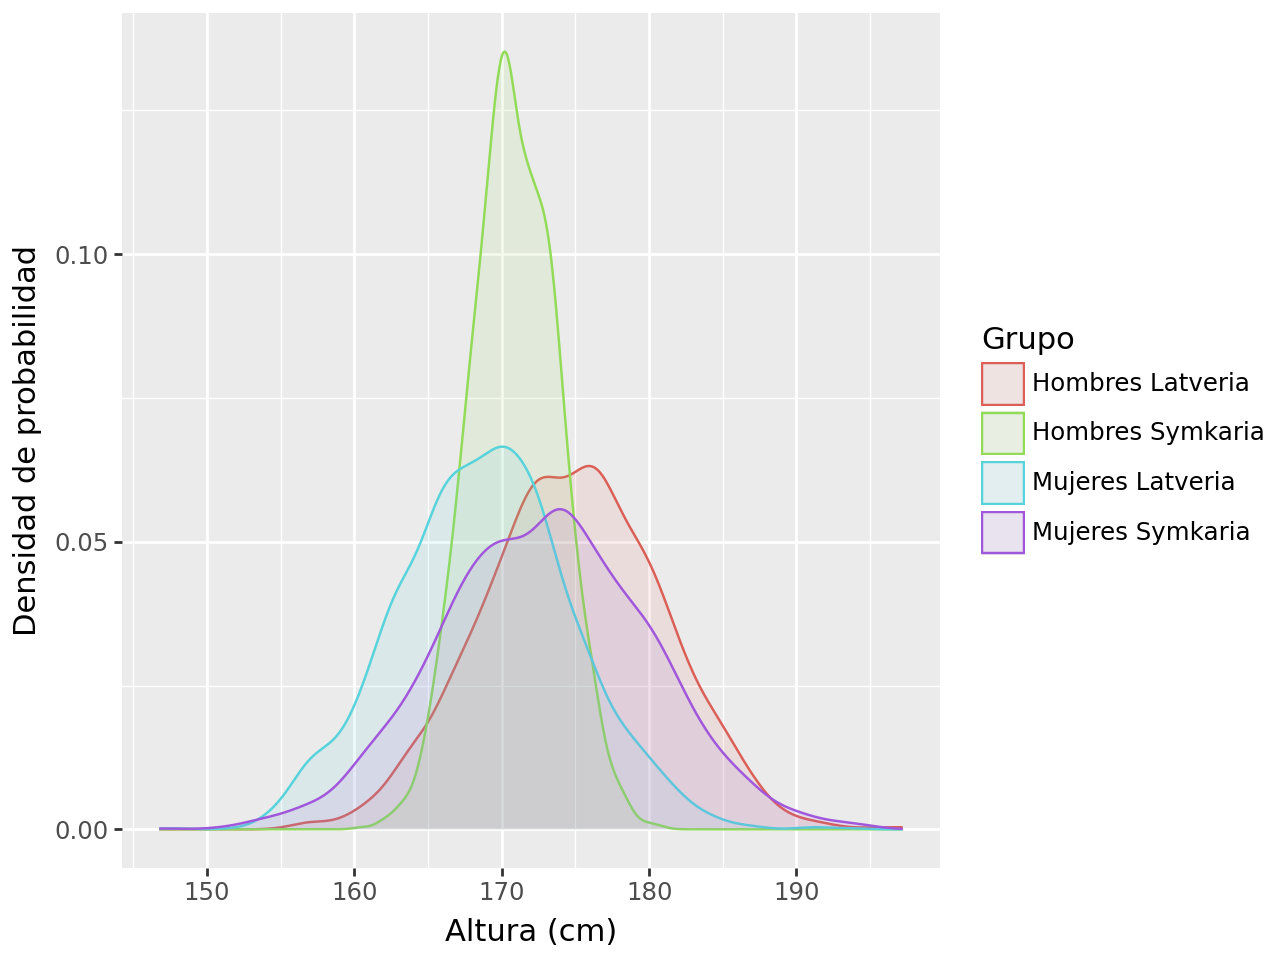

In [81]:
# Aunque no se pide represento la distribución normal de cada población. Para ello creo un nuevo dataframe, df2, con dos columnas
from pandas.core.common import flatten

HL = list(hombres_Latveria)
ML = list(mujeres_Latveria)
HS = list(hombres_Symkaria)
MS = list(mujeres_Symkaria)

# Lista con todas las alturas
columna = HL + ML + HS + MS

clase = [['Hombres Latveria']*2000, ['Mujeres Latveria']*2000, ['Hombres Symkaria']*2000, ['Mujeres Symkaria']*2000]
clase = list(flatten(clase))

dic2 = {'Altura':columna, 'Grupo':clase}
df2 = pd.DataFrame(dic2)

(ggplot(df2, aes(x='Altura', color='Grupo', fill='Grupo')) + geom_density(alpha=0.1) + xlab('Altura (cm)')
+ ylab('Densidad de probabilidad'))

In [79]:
# Calculamos la media y la desviación típica de cada población usando las funciones estadísticas de Numpy.
# Creamos una serie para la población de Latveria, pL, y otra para la población de Symkaria, pS.

pL = pd.Series(HL + ML)
pS = pd.Series(HS + MS)

print('La media de altura en Latveria son', round(np.mean(pL),2), 'cm con desviación típica', round(np.std(pL),2))
print('La media de altura en Symkaria son', round(np.mean(pS),2), 'cm con desviación típica', round(np.std(pS),2))

La media de altura en Latveria son 171.83 cm con desviación típica 6.71
La media de altura en Symkaria son 171.88 cm con desviación típica 5.52


In [87]:
# Apartado b)
# Escogemos como estratos: i) Hombres de Latveria, ii) Mujeres de Latveria, iii) Hombres de Symkaria, iv) Mujeres de Symkaria

np.random.seed(seed=11)
hombres_Latveria = np.random.normal(175,6,100)
mujeres_Latveria = np.random.normal(169,6,100)
hombres_Symkaria = np.random.normal(171,3,100)
mujeres_Symkaria = np.random.normal(173,7,100)

print('La media de altura del estrato 1 son', round(np.mean(hombres_Latveria),2), 'con desviación típica', round(np.std(hombres_Latveria),2))
print('La media de altura del estrato 2 son', round(np.mean(mujeres_Latveria),2), 'con desviación típica', round(np.std(mujeres_Latveria),2))
print('La media de altura del estrato 3 son', round(np.mean(hombres_Symkaria),2), 'con desviación típica', round(np.std(hombres_Symkaria),2))
print('La media de altura del estrato 4 son', round(np.mean(mujeres_Symkaria),2), 'con desviación típica', round(np.std(mujeres_Symkaria),2))

La media de altura del estrato 1 son 175.07 con desviación típica 5.6
La media de altura del estrato 2 son 169.02 con desviación típica 5.71
La media de altura del estrato 3 son 170.95 con desviación típica 3.03
La media de altura del estrato 4 son 172.8 con desviación típica 7.02


In [114]:
# También podría haber resuelto el apartado aplicando un filtro al dataframe df2, que ya está dividido en estratos de 2000 individuos cada uno.

filtro1 = df2['Grupo']=='Hombres Latveria'
filtro2 = df2['Grupo']=='Mujeres Latveria'
filtro3 = df2['Grupo']=='Hombres Symkaria'
filtro4 = df2['Grupo']=='Mujeres Symkaria'

estrato1 = df2[filtro1]
sample1 = estrato1.sample(frac=0.05)
sample1 = sample1['Altura']

estrato2 = df2[filtro2]
sample2 = estrato2.sample(frac=0.05)
sample2 = sample2['Altura']

estrato3 = df2[filtro3]
sample3 = estrato3.sample(frac=0.05)
sample3 = sample3['Altura']

estrato4 = df2[filtro4]
sample4 = estrato4.sample(frac=0.05)
sample4 = sample4['Altura']

print('La media de altura del estrato 1 son', round(np.mean(sample1),2), 'con desviación típica', round(np.std(sample1),2))
print('La media de altura del estrato 2 son', round(np.mean(sample2),2), 'con desviación típica', round(np.std(sample2),2))
print('La media de altura del estrato 3 son', round(np.mean(sample3),2), 'con desviación típica', round(np.std(sample3),2))
print('La media de altura del estrato 4 son', round(np.mean(sample4),2), 'con desviación típica', round(np.std(sample4),2))

La media de altura del estrato 1 son 175.88 con desviación típica 5.2
La media de altura del estrato 2 son 168.47 con desviación típica 5.88
La media de altura del estrato 3 son 170.86 con desviación típica 3.0
La media de altura del estrato 4 son 171.41 con desviación típica 7.3


In [132]:
# Apartado c)
# Un conglomerado debe ser como una recreación de la población total pero en pequeño. Formamos un conglomerado con 50 individuos de cada estrato del
# apartado anterior. Para formar el conglomerado usamos las series de Pandas.

np.random.seed(seed=11)

# Conglomerado 1
sample1 = estrato1.sample(frac=0.025)
sample2 = estrato2.sample(frac=0.025)
sample3 = estrato3.sample(frac=0.025)
sample4 = estrato4.sample(frac=0.025)
cong1 = pd.Series(list(sample1['Altura'])+list(sample2['Altura'])+list(sample3['Altura'])+list(sample4['Altura']))

print('La media de altura del conglomerado 1 son', round(np.mean(cong1),2), 'con desviación típica', round(np.std(cong1),2))

# Conglomerado 2
sample5 = estrato1.sample(frac=0.025)
sample6 = estrato2.sample(frac=0.025)
sample7 = estrato3.sample(frac=0.025)
sample8 = estrato4.sample(frac=0.025)
cong2 = pd.Series(list(sample5['Altura'])+list(sample6['Altura'])+list(sample7['Altura'])+list(sample8['Altura']))

print('La media de altura del conglomerado 2 son', round(np.mean(cong2),2), 'con desviación típica', round(np.std(cong2),2))

La media de altura del conglomerado 1 son 172.31 con desviación típica 6.07
La media de altura del conglomerado 2 son 172.64 con desviación típica 6.27
